In [2]:
#ANOVA
import pandas as pd
from scipy import stats
data = pd.DataFrame({
    'Campaign': ['A']*5 + ['B']*5 + ['C']*5,
    'Conversions': [20, 22, 23, 24, 25, 28, 30, 29, 31, 32, 40, 42, 41, 43, 44]
    })
# Create a list of conversion groups by campaign
groups = [data[data['Campaign'] == g]['Conversions'] for g in ['A', 'B', 'C']]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

F-statistic = 162.21, p-value = 0.0000


In [3]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(data['Conversions'], data['Campaign'], alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      7.2 0.0001  4.3266 10.0734   True
     A      C     19.2    0.0 16.3266 22.0734   True
     B      C     12.0    0.0  9.1266 14.8734   True
----------------------------------------------------


In [4]:
#MANOVA
from statsmodels.multivariate.manova import MANOVA

df = pd.DataFrame({ 'Campaign': ['A','A','B','B','C','C'], 'Sales': [200,220,230,240,260,270], 'Profit': [45,46,48,50,52,54] })

maov = MANOVA.from_formula('Sales + Profit ~ Campaign', data=df)

print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value   Num DF Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0009 2.0000 2.0000 1094.3333 0.0009
         Pillai's trace    0.9991 2.0000 2.0000 1094.3333 0.0009
 Hotelling-Lawley trace 1094.3333 2.0000 1.0000  547.1667 0.0302
    Roy's greatest root 1094.3333 2.0000 2.0000 1094.3333 0.0009
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Campaign         Value  Num DF Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda  0.0722 4.0000 4.0000  2.7218 0.1778
             Pillai's trace  0.9332 4.0000 6.

In [5]:
#ANCOVA
import statsmodels.formula.api as smf

df = pd.DataFrame({
    'Campaign': ['A','A','B','B','C','C'],
    'Sales': [200,220,230,240,260,270],
    'Budget': [10,11,12,13,14,15]
})

model = smf.ols('Sales ~ C(Campaign) + Budget', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) #typ=2 order doesnt matter
print(anova_table)


                 sum_sq   df          F    PR(>F)
C(Campaign)    8.571429  2.0   0.257143  0.795455
Budget       266.666667  1.0  16.000000  0.057191
Residual      33.333333  2.0        NaN       NaN


In [9]:
# MANCOVA
# Python MANCOVA demonstration
import pandas as pd
import numpy as np
from statsmodels.multivariate.manova import MANOVA

# -----------------------------
# Create a sample dataset
# -----------------------------
np.random.seed(42)
data = pd.DataFrame({
    'Group': ['A']*5 + ['B']*5,
    'Score_Math': [80, 85, 78, 90, 82, 88, 92, 85, 91, 87],
    'Score_English': [75, 80, 78, 82, 77, 85, 88, 84, 90, 86],
    'StudyHours': [8, 10, 7, 12, 9, 14, 13, 11, 15, 12]   # Continuous covariate
})

print("Sample Data:")
print(data)

# -----------------------------
# Run MANCOVA
# -----------------------------
# Formula: dependent variables ~ independent variable(s) + covariate(s)
mancova = MANOVA.from_formula('Score_Math + Score_English ~ Group + StudyHours', data=data)
result = mancova.mv_test()

print("\nMANCOVA Results:")
print(result)

#Group INDEPENDET VARIABLE
#Score_Math and Score_English DEPENDENT VARIABLES
#StudyHours COVARIATE

Sample Data:
  Group  Score_Math  Score_English  StudyHours
0     A          80             75           8
1     A          85             80          10
2     A          78             78           7
3     A          90             82          12
4     A          82             77           9
5     B          88             85          14
6     B          92             88          13
7     B          85             84          11
8     B          91             90          15
9     B          87             86          12

MANCOVA Results:
                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept         Value  Num DF Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0138 2.0000 6.0000 214.2399 0.0000
         Pillai's trace  0.9862 2.0000 6.0000 214.2399 0.0000
 Hotelling-Lawley trace 71.4133 2.00

<Axes: xlabel='Group', ylabel='StudyHours'>

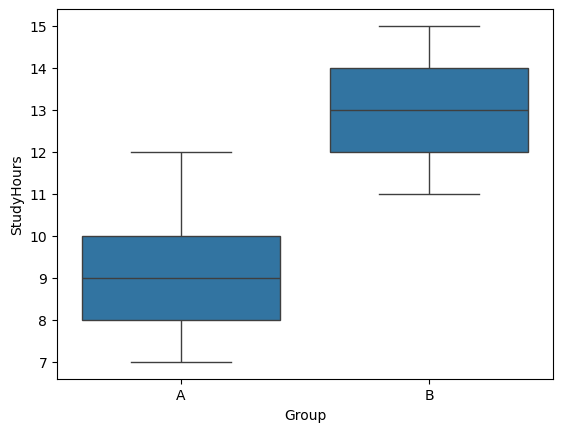

In [10]:
import seaborn as sns
sns.boxplot(x='Group', y='StudyHours', data=data)